<a href="https://colab.research.google.com/github/ZefraAlseif/Project1_Wine_Network/blob/main/ClassificationModel_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adapting the original wine data to a regression model and classification model

In [4]:
#@title Data as Numpy Arrays
import matplotlib.pyplot as plt
import numpy as np
# This time we need to also import pandas
import pandas as pd
from io import StringIO

# Read in white wine data
# Uses PANDAS (pd) to create a PANDAS DataFrame Object:
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ';')

# Read in red wine data
# Uses PANDAS (pd) to create a PANDAS DataFrame Object:
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';')

red['type'] = 1
white['type'] = 0

wines = red.append(white, ignore_index = True)

# Import SKLEARN
import sklearn

# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split
# Specify the data -
X1 = wines.iloc[:, 0:11]
X2 = wines.iloc[:,12]
X = pd.concat([X1,X2],axis = 1)

y = np.ravel(wines.quality)

# Splitting the data set for training and validating - Done with SKLEARN
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.25, random_state = 45)

# Converting X_train & X_test DataFrame s to TF sensors
# Will use NumPy, TF, & Keras after this
# import tensorflow as tf

Xtrain = X_train.to_numpy()
X_valid = X_valid.to_numpy()

X_valid
# In reality:
# [1] ALL THE Xtrain patterns (with their y_train targets)
# will be used for TRAINING ([TR]), as Xtrain & y_train
# [2] MOST OF THE X_valid patterns (and their y_valid targets)
# will be used for VALIDATION ([TT]), as X_val & y_val
# BUT WE WILL SET ASIDE THE LAST 10 for "testing" ([TS])
# as X_tst & y_tst

# Retain the first 1615 patterns for validation ([TT])
Xval = X_valid[:1615]
Xval.shape

# and now set aside the last 10 for test
Xtst = X_valid[1615:]
Xtst.shape

# Same for the corresponding targets
# Retain the first 1615 for validation ([TT])
y_val = y_valid[:1615]
y_val.shape

y_tst = y_valid[1615:]
y_tst.shape 
y_tst

# Now, in addition, create the targets as one-hot-encoded 4 quality levels
# We will track these few targets through the conversion process
y_train[272:283]

# Function create rank-1 arrays where 3,4,5,6,7,8,9 are mapped to 1 or 2 or 3 or 4 
def to_4cs(x):
  lx = len(x)
  results = np.zeros(lx)
  for i in range(lx):
    # print("start")
    xa = x[i];
    if xa <= 3:
      results[i] = 1
    elif xa <= 6:
      results[i] = 2
    elif xa <= 8:
      results[i] = 3
    else:
      results[i] = 4
    # results [i, label] = 1
  results = results.astype(int)
  return results

train_labels = to_4cs(y_train)
val_labels = to_4cs(y_val)
tst_labels = to_4cs(y_tst)

# Let's verify that the training targets that we are tracking 
# were converted to levels (1 = BAD; 2 = Medium; 3 = GOOD; 4- Excellent) correctly:
train_labels[272:283]

# Now, one shot encoding of all 3 target arrays
# define a function to do the 

def to_one_hot(labels, dimension = 4):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels-1):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_val_labels = to_one_hot(val_labels)
one_hot_tst_labels = to_one_hot(tst_labels)

#Let's verify that the training targets we have tracked were
# one-hot encoded correctly
Xtrain.shape

# SO, AFTER EXECUTING THIS CELL, YOU WILL HAVE:
# FOR TRAINING:
# Xtrain (4872, 12)...y_train (4872,)...train_labels(4872,)....one_hot_train_labels (4872,4)
# FOR VALIDATING:
# Xval (1615, 12)...y_val (1615,)...val_labels(1615,)...one_hot_val_labels (1615,4)
# FOR TESTING:
# Xtst (10, 12)...y_tst (10,)...tst_labels(10,)... one_hot_tst_labels (10,4)
# PLEASE DO NOT CHANGE THE NAMES OF THESE VARIABLES (So that instructor can use them)


(4872, 12)

# III.0 Estimating

In [5]:
import copy
y_val_copy = copy.copy(y_val)
np.random.shuffle(y_val)
hits_array = np.array(y_val) == np.array(y_val_copy)
print("Accuracy using random classifier ",hits_array.mean())

Accuracy using random classifier  0.33622291021671824


# III.1 Classification Model 1 (clasmodl1)

In [11]:
from keras.engine.input_layer import Input
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_clasmodl1():
  clasmodl1 = keras.Sequential(
      [
        layers.Dense(8, activation = 'relu'),
        layers.Dense(4, activation = 'softmax')
      ]
)
  clasmodl1.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])
  return clasmodl1

clasmodl1 = build_clasmodl1()
history_clasmodl1 = clasmodl1.fit(x = Xtrain,y = one_hot_train_labels, batch_size = 32, epochs = 50, verbose = 2, validation_data = (Xval,one_hot_val_labels), validation_freq = 1)

clasmodl1.summary()

Epoch 1/50
153/153 - 1s - loss: 2.0238 - accuracy: 0.6517 - val_loss: 1.4084 - val_accuracy: 0.5313 - 878ms/epoch - 6ms/step
Epoch 2/50
153/153 - 0s - loss: 0.8669 - accuracy: 0.7685 - val_loss: 0.8796 - val_accuracy: 0.7845 - 280ms/epoch - 2ms/step
Epoch 3/50
153/153 - 0s - loss: 0.6998 - accuracy: 0.7869 - val_loss: 0.6690 - val_accuracy: 0.7845 - 341ms/epoch - 2ms/step
Epoch 4/50
153/153 - 0s - loss: 0.6400 - accuracy: 0.7880 - val_loss: 0.8309 - val_accuracy: 0.7839 - 253ms/epoch - 2ms/step
Epoch 5/50
153/153 - 0s - loss: 0.6007 - accuracy: 0.7904 - val_loss: 0.6707 - val_accuracy: 0.7214 - 253ms/epoch - 2ms/step
Epoch 6/50
153/153 - 0s - loss: 0.5852 - accuracy: 0.7869 - val_loss: 0.5767 - val_accuracy: 0.7858 - 271ms/epoch - 2ms/step
Epoch 7/50
153/153 - 0s - loss: 0.5717 - accuracy: 0.7865 - val_loss: 0.6972 - val_accuracy: 0.6898 - 252ms/epoch - 2ms/step
Epoch 8/50
153/153 - 0s - loss: 0.5666 - accuracy: 0.7855 - val_loss: 0.5585 - val_accuracy: 0.7802 - 258ms/epoch - 2ms/step


## Plots of Classification Model 1 and Final Values

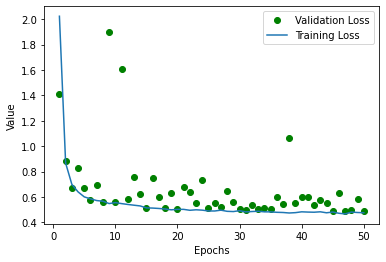

Final Training loss:  0.475739061832428 
Final Training Accuracy:  0.8041871786117554
Final Validation loss:  0.4918537437915802 
Final Validation Accuracy:  0.7919504642486572


In [12]:
# Plot the validation and training loss
plt.plot(range(1, len(history_clasmodl1.history['val_loss']) + 1), history_clasmodl1.history['val_loss'], 'go', label = "Validation Loss")
plt.plot(range(1, len(history_clasmodl1.history['loss']) + 1), history_clasmodl1.history['loss'],label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()
# Final Values
print("Final Training loss: ",history_clasmodl1.history['loss'][-1],"\nFinal Training Accuracy: ", history_clasmodl1.history['accuracy'][-1])
print("Final Validation loss: ",history_clasmodl1.history['val_loss'][-1],"\nFinal Validation Accuracy: ", history_clasmodl1.history['val_accuracy'][-1])

# III.2 Classification Model 2 (clasmodl2)

In [9]:
from keras.engine.input_layer import Input
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_clasmodl2():
  clasmodl2 = keras.Sequential(
      [
        layers.Dense(512, activation = 'relu'),
        layers.Dense(100, activation = 'relu'),
        layers.Dense(30, activation = 'relu'),
        layers.Dense(100, activation = 'relu'),
        layers.Dense(4, activation = 'softmax')
      ]
)
  clasmodl2.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])
  return clasmodl2

clasmodl2 = build_clasmodl2()
history_clasmodl2 = clasmodl2.fit(x = Xtrain,y = one_hot_train_labels, batch_size = 128, epochs = 200, verbose = 2, validation_data = (Xval,one_hot_val_labels), validation_freq = 1)

#clasmodl2.summary()

Epoch 1/200
39/39 - 1s - loss: 1.0255 - accuracy: 0.7410 - val_loss: 0.6067 - val_accuracy: 0.7839 - 1s/epoch - 28ms/step
Epoch 2/200
39/39 - 0s - loss: 0.6788 - accuracy: 0.7705 - val_loss: 0.7608 - val_accuracy: 0.7839 - 197ms/epoch - 5ms/step
Epoch 3/200
39/39 - 0s - loss: 0.5451 - accuracy: 0.8034 - val_loss: 0.6564 - val_accuracy: 0.6656 - 186ms/epoch - 5ms/step
Epoch 4/200
39/39 - 0s - loss: 0.5776 - accuracy: 0.7849 - val_loss: 0.5734 - val_accuracy: 0.7820 - 232ms/epoch - 6ms/step
Epoch 5/200
39/39 - 0s - loss: 0.5363 - accuracy: 0.8032 - val_loss: 0.6347 - val_accuracy: 0.7839 - 240ms/epoch - 6ms/step
Epoch 6/200
39/39 - 0s - loss: 0.5489 - accuracy: 0.7894 - val_loss: 0.5551 - val_accuracy: 0.7839 - 232ms/epoch - 6ms/step
Epoch 7/200
39/39 - 0s - loss: 0.5265 - accuracy: 0.8030 - val_loss: 0.5475 - val_accuracy: 0.7839 - 194ms/epoch - 5ms/step
Epoch 8/200
39/39 - 0s - loss: 0.5256 - accuracy: 0.8032 - val_loss: 0.6166 - val_accuracy: 0.7839 - 201ms/epoch - 5ms/step
Epoch 9/20

## Plots of Classification Model 2 and Final Values

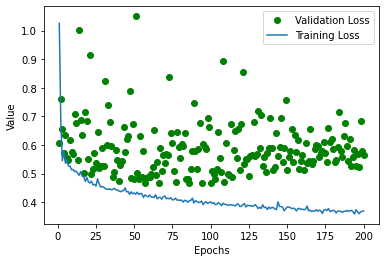

Final Training loss:  0.3695135712623596 
Final Training Accuracy:  0.8362069129943848
Final Validation loss:  0.5642444491386414 
Final Validation Accuracy:  0.8229101896286011


In [10]:
# Plot the validation and training loss
plt.plot(range(1, len(history_clasmodl2.history['val_loss']) + 1), history_clasmodl2.history['val_loss'], 'go', label = "Validation Loss")
plt.plot(range(1, len(history_clasmodl2.history['loss']) + 1), history_clasmodl2.history['loss'],label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()
# Final Values
print("Final Training loss: ",history_clasmodl2.history['loss'][-1],"\nFinal Training Accuracy: ", history_clasmodl2.history['accuracy'][-1])
print("Final Validation loss: ",history_clasmodl2.history['val_loss'][-1],"\nFinal Validation Accuracy: ", history_clasmodl2.history['val_accuracy'][-1])

# III.3 Classification Model 3 (clasmodl3)

In [13]:
from keras.engine.input_layer import Input
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_clasmodl3():
  clasmodl3 = keras.Sequential(
      [
        layers.Dense(512, activation = 'relu'),
        layers.Dense(100, activation = 'relu'),
        layers.Dense(30, activation = 'relu'),
        layers.Dense(100, activation = 'relu'),
        layers.Dense(4, activation = 'softmax')
      ]
)
  clasmodl3.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])
  return clasmodl3

clasmodl3 = build_clasmodl3()
history_clasmodl3 = clasmodl3.fit(x = Xtrain,y = one_hot_train_labels, batch_size = 128, epochs = 50, verbose = 2, validation_data = (Xval,one_hot_val_labels), validation_freq = 1)
clasmodl3.save('my_clasmodl3.h5')

#clasmodl3.summary()

Epoch 1/50
39/39 - 1s - loss: 0.8338 - accuracy: 0.7488 - val_loss: 0.6245 - val_accuracy: 0.7839 - 1s/epoch - 29ms/step
Epoch 2/50
39/39 - 0s - loss: 0.6102 - accuracy: 0.7904 - val_loss: 0.6061 - val_accuracy: 0.7839 - 231ms/epoch - 6ms/step
Epoch 3/50
39/39 - 0s - loss: 0.5699 - accuracy: 0.7921 - val_loss: 0.7504 - val_accuracy: 0.7839 - 180ms/epoch - 5ms/step
Epoch 4/50
39/39 - 0s - loss: 0.5323 - accuracy: 0.8025 - val_loss: 0.8990 - val_accuracy: 0.7839 - 236ms/epoch - 6ms/step
Epoch 5/50
39/39 - 0s - loss: 0.5366 - accuracy: 0.8030 - val_loss: 0.8148 - val_accuracy: 0.7839 - 241ms/epoch - 6ms/step
Epoch 6/50
39/39 - 0s - loss: 0.5282 - accuracy: 0.8040 - val_loss: 0.5793 - val_accuracy: 0.7845 - 206ms/epoch - 5ms/step
Epoch 7/50
39/39 - 0s - loss: 0.5193 - accuracy: 0.8034 - val_loss: 0.5680 - val_accuracy: 0.7839 - 196ms/epoch - 5ms/step
Epoch 8/50
39/39 - 0s - loss: 0.5291 - accuracy: 0.7935 - val_loss: 0.8936 - val_accuracy: 0.7839 - 235ms/epoch - 6ms/step
Epoch 9/50
39/39 -

## Plots for Classification Model 3 and Final Values

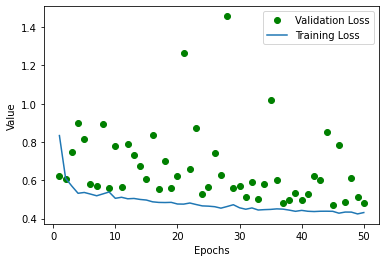

Final Training loss:  0.4316848814487457 
Final Training Accuracy:  0.8128078579902649
Final Validation loss:  0.4793102443218231 
Final Validation Accuracy:  0.7882353067398071


In [14]:
# Plot the validation and training loss
plt.plot(range(1, len(history_clasmodl3.history['val_loss']) + 1), history_clasmodl3.history['val_loss'], 'go', label = "Validation Loss")
plt.plot(range(1, len(history_clasmodl3.history['loss']) + 1), history_clasmodl3.history['loss'],label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()
# Final Values
print("Final Training loss: ",history_clasmodl3.history['loss'][-1],"\nFinal Training Accuracy: ", history_clasmodl3.history['accuracy'][-1])
print("Final Validation loss: ",history_clasmodl3.history['val_loss'][-1],"\nFinal Validation Accuracy: ", history_clasmodl3.history['val_accuracy'][-1])

## Predicting the Output

In [15]:
# Predicting the activation and inputting it alongside the targets
# into the predict_table 
from pandas.core.arrays.sparse import dtype
predict_labels = clasmodl3.predict(Xtst)
predict_table = pd.DataFrame(Xtst)
predict_table["activation"]=[predict_labels[x,:] for x in range(len(predict_labels))]
predict_table["target"]=[one_hot_tst_labels[x,:] for x in range(len(one_hot_tst_labels))]
predict_labels = np.around(predict_labels)
# Checking which activations match their target i.e accuracy
check = np.empty((10,4), dtype=bool)
hits = []
for i in range(len(predict_labels)):
  check[i,:] = predict_labels[i,:] == one_hot_tst_labels[i,:] 
  if (np.count_nonzero(check[i,:]) == 4):
    hits.append("Hit")
  else:
    hits.append("Missed")
predict_table["accuracy"] = hits

# Renaming the columns of the table
predict_table.columns.values[0] = "f1"
predict_table.columns.values[1] = "f2"
predict_table.columns.values[2] = "f3"
predict_table.columns.values[3] = "f4"
predict_table.columns.values[4] = "f5"
predict_table.columns.values[5] = "f6"
predict_table.columns.values[6] = "f7"
predict_table.columns.values[7] = "f8"
predict_table.columns.values[8] = "f9"
predict_table.columns.values[9] = "f10"
predict_table.columns.values[10] = "f11"
predict_table.columns.values[11] = "f12"
display(predict_table)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,activation,target,accuracy
0,7.4,0.44,0.20,11.5,0.049,44.0,157.0,0.99800,3.27,0.44,9.000000,0.0,"[0.0010848407, 0.9573048, 0.041609883, 6.24627...","[0.0, 1.0, 0.0, 0.0]",Hit
1,6.5,0.23,0.36,16.3,0.038,43.0,133.0,0.99924,3.26,0.41,8.800000,0.0,"[6.786809e-06, 0.9801516, 0.019841518, 1.14908...","[0.0, 1.0, 0.0, 0.0]",Hit
2,5.6,0.41,0.24,1.9,0.034,10.0,53.0,0.98815,3.32,0.50,13.500000,0.0,"[0.0016311877, 0.5857639, 0.4092513, 0.0033536...","[0.0, 0.0, 1.0, 0.0]",Missed
3,6.4,0.67,0.08,2.1,0.045,19.0,48.0,0.99490,3.49,0.49,11.400000,1.0,"[0.0010622812, 0.93931246, 0.05961919, 6.09281...","[0.0, 1.0, 0.0, 0.0]",Hit
4,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.99340,3.08,0.45,9.100000,0.0,"[0.00043470034, 0.9150235, 0.08454132, 4.32676...","[0.0, 1.0, 0.0, 0.0]",Hit
5,6.9,0.41,0.33,10.1,0.043,28.0,152.0,0.99680,3.20,0.52,9.400000,0.0,"[0.003761721, 0.906404, 0.08975945, 7.4819094e...","[0.0, 1.0, 0.0, 0.0]",Hit
6,5.9,0.32,0.33,2.1,0.027,35.0,138.0,0.98945,3.37,0.42,12.700000,0.0,"[0.00018569552, 0.62310886, 0.37645802, 0.0002...","[0.0, 1.0, 0.0, 0.0]",Hit
7,6.0,0.24,0.41,1.3,0.036,42.0,118.0,0.99018,3.04,0.64,11.733333,0.0,"[0.0006020492, 0.5680213, 0.42969406, 0.001682...","[0.0, 1.0, 0.0, 0.0]",Hit
8,7.3,0.48,0.32,2.1,0.062,31.0,54.0,0.99728,3.30,0.65,10.000000,1.0,"[0.0002626776, 0.83705467, 0.16262574, 5.69911...","[0.0, 0.0, 1.0, 0.0]",Missed
9,7.4,0.24,0.22,10.7,0.042,26.0,81.0,0.99540,2.86,0.36,9.700000,0.0,"[0.0023069573, 0.86245453, 0.13375148, 0.00148...","[0.0, 1.0, 0.0, 0.0]",Hit
